<a href="https://colab.research.google.com/github/plthiyagu/DataScience-Enterprise-Architect/blob/master/10-TimeSeries/Timeseries_wtih_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
time = np.arange(0, 100, 0.1)
## Add noise to the data, by adding random value to each data point, the random
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

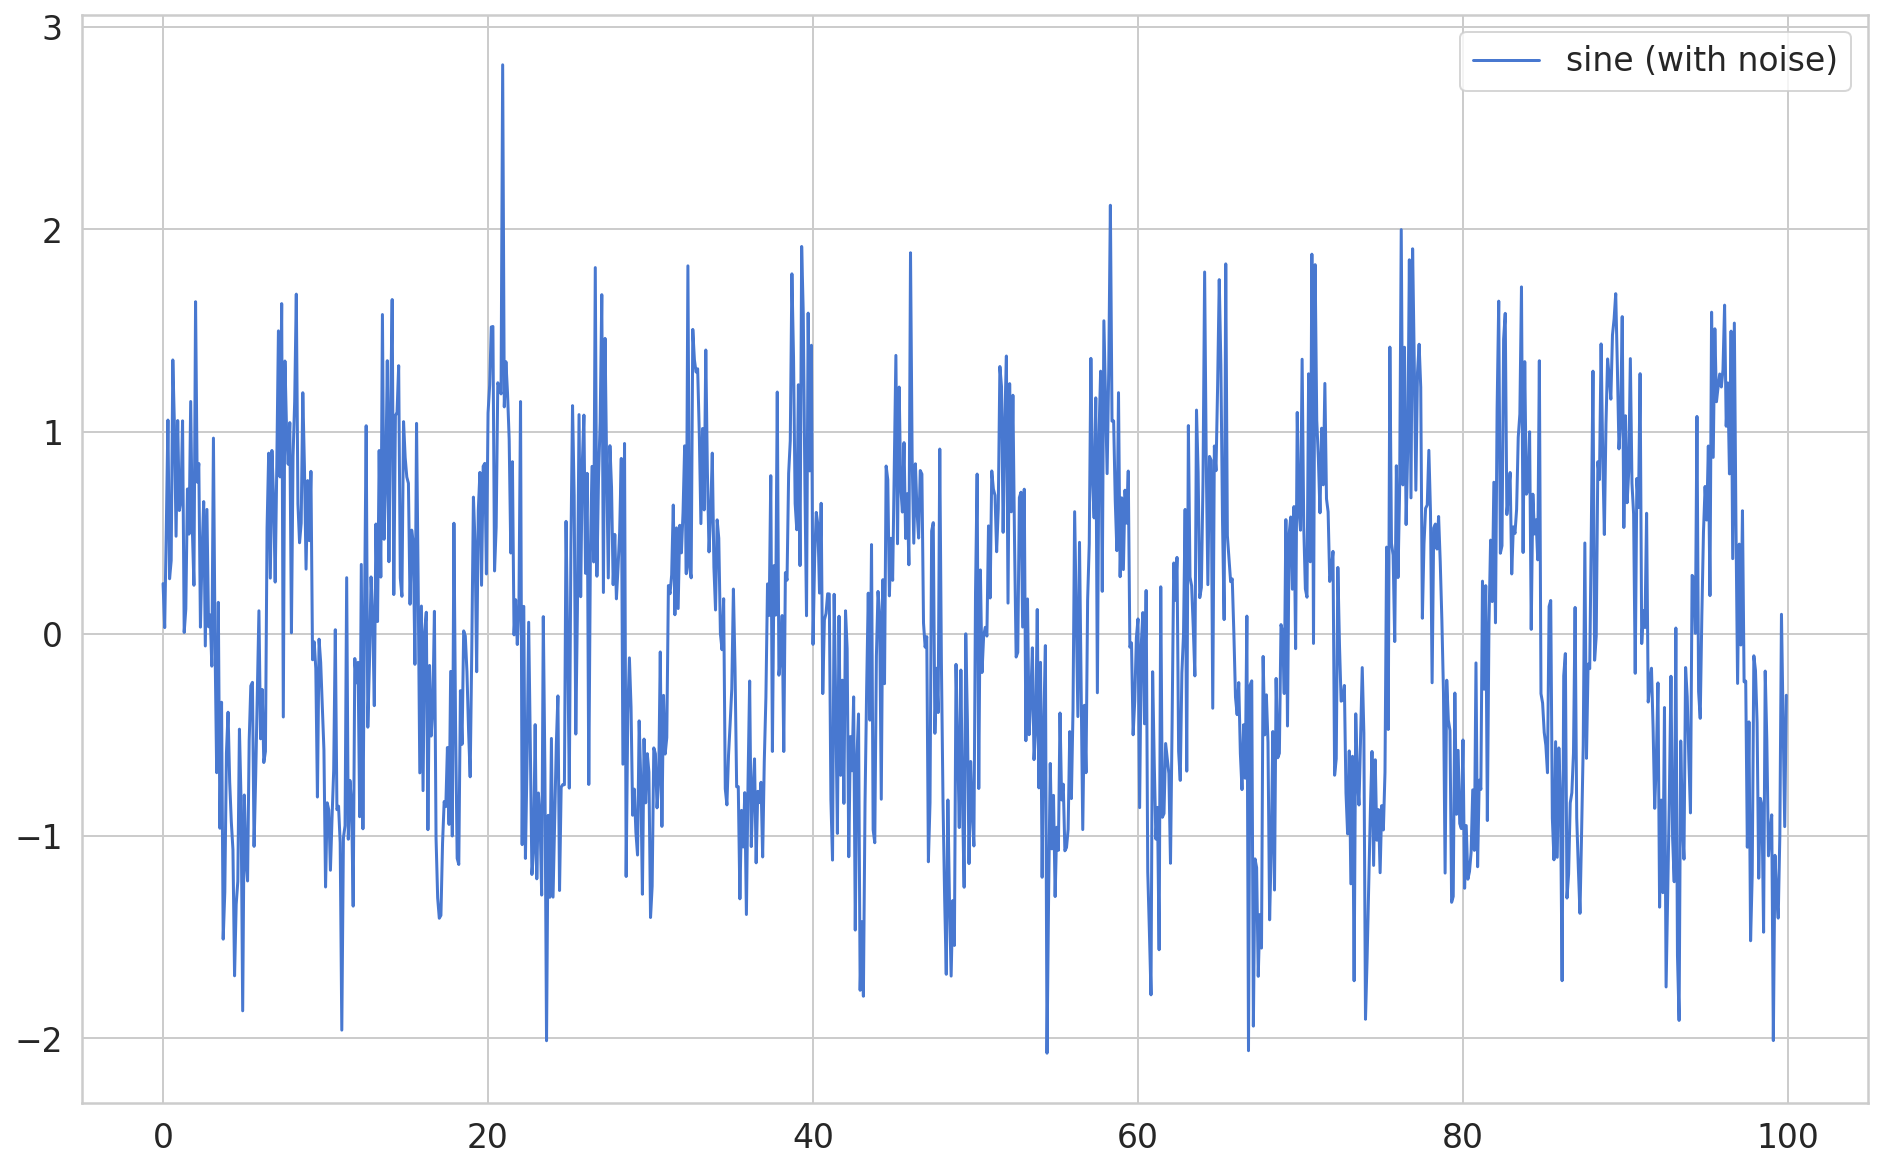

In [3]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

In [4]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [5]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [6]:
def create_dataset(X, y, time_steps=1):

  """
  Works with single features(univariate) and multiple features

  """
  Xs, ys = [], []
  for i in range(len(X) - time_steps):
    v = X.iloc[i:(i + time_steps)].values
    Xs.append(v)
    ys.append(y.iloc[i + time_steps])
  return np.array(Xs), np.array(ys)

In [7]:
# History of 10 time steps to make the sequences
time_steps = 10

In [8]:
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [11]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
 units=128,
 input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile( loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.001))

In [12]:
# LSTM expects the number of time steps and number of features

In [13]:
 history = model.fit(
 X_train, y_train,
 epochs=30,
 batch_size=16,
 validation_split=0.1,
 verbose=1,
 shuffle=False
)

Epoch 1/30
45/45 [==============================] - 4s 21ms/step - loss: 0.4107 - val_loss: 0.3666
Epoch 2/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3288 - val_loss: 0.3246
Epoch 3/30
45/45 [==============================] - 0s 11ms/step - loss: 0.3194 - val_loss: 0.3212
Epoch 4/30
45/45 [==============================] - 1s 16ms/step - loss: 0.3182 - val_loss: 0.3186
Epoch 5/30
45/45 [==============================] - 1s 16ms/step - loss: 0.3172 - val_loss: 0.3167
Epoch 6/30
45/45 [==============================] - 1s 16ms/step - loss: 0.3164 - val_loss: 0.3151
Epoch 7/30
45/45 [==============================] - 1s 13ms/step - loss: 0.3156 - val_loss: 0.3137
Epoch 8/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3150 - val_loss: 0.3124
Epoch 9/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3143 - val_loss: 0.3112
Epoch 10/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3135 - val_loss: 0.3099
Epoch 11/

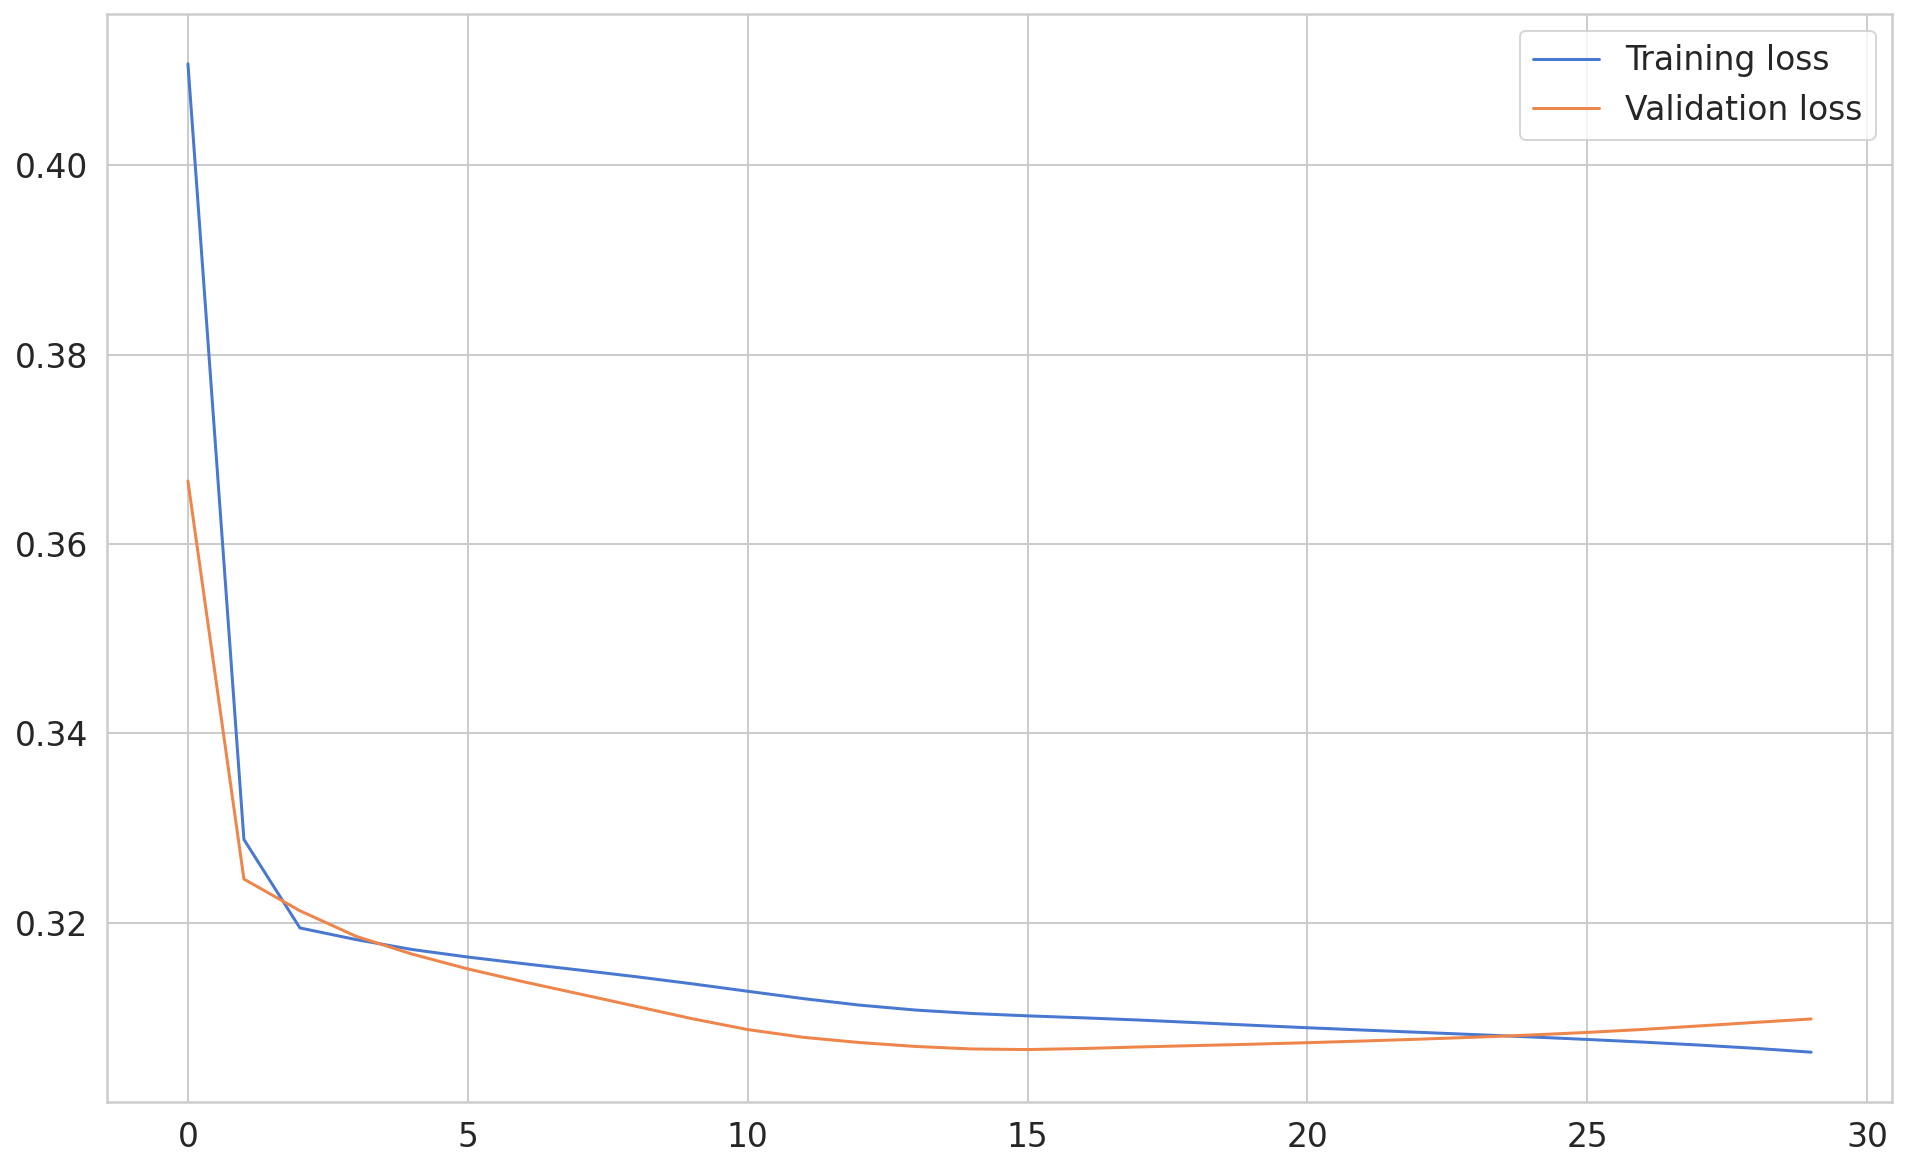

In [14]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [15]:
y_pred = model.predict(X_test)


6/6 [==============================] - 1s 12ms/step


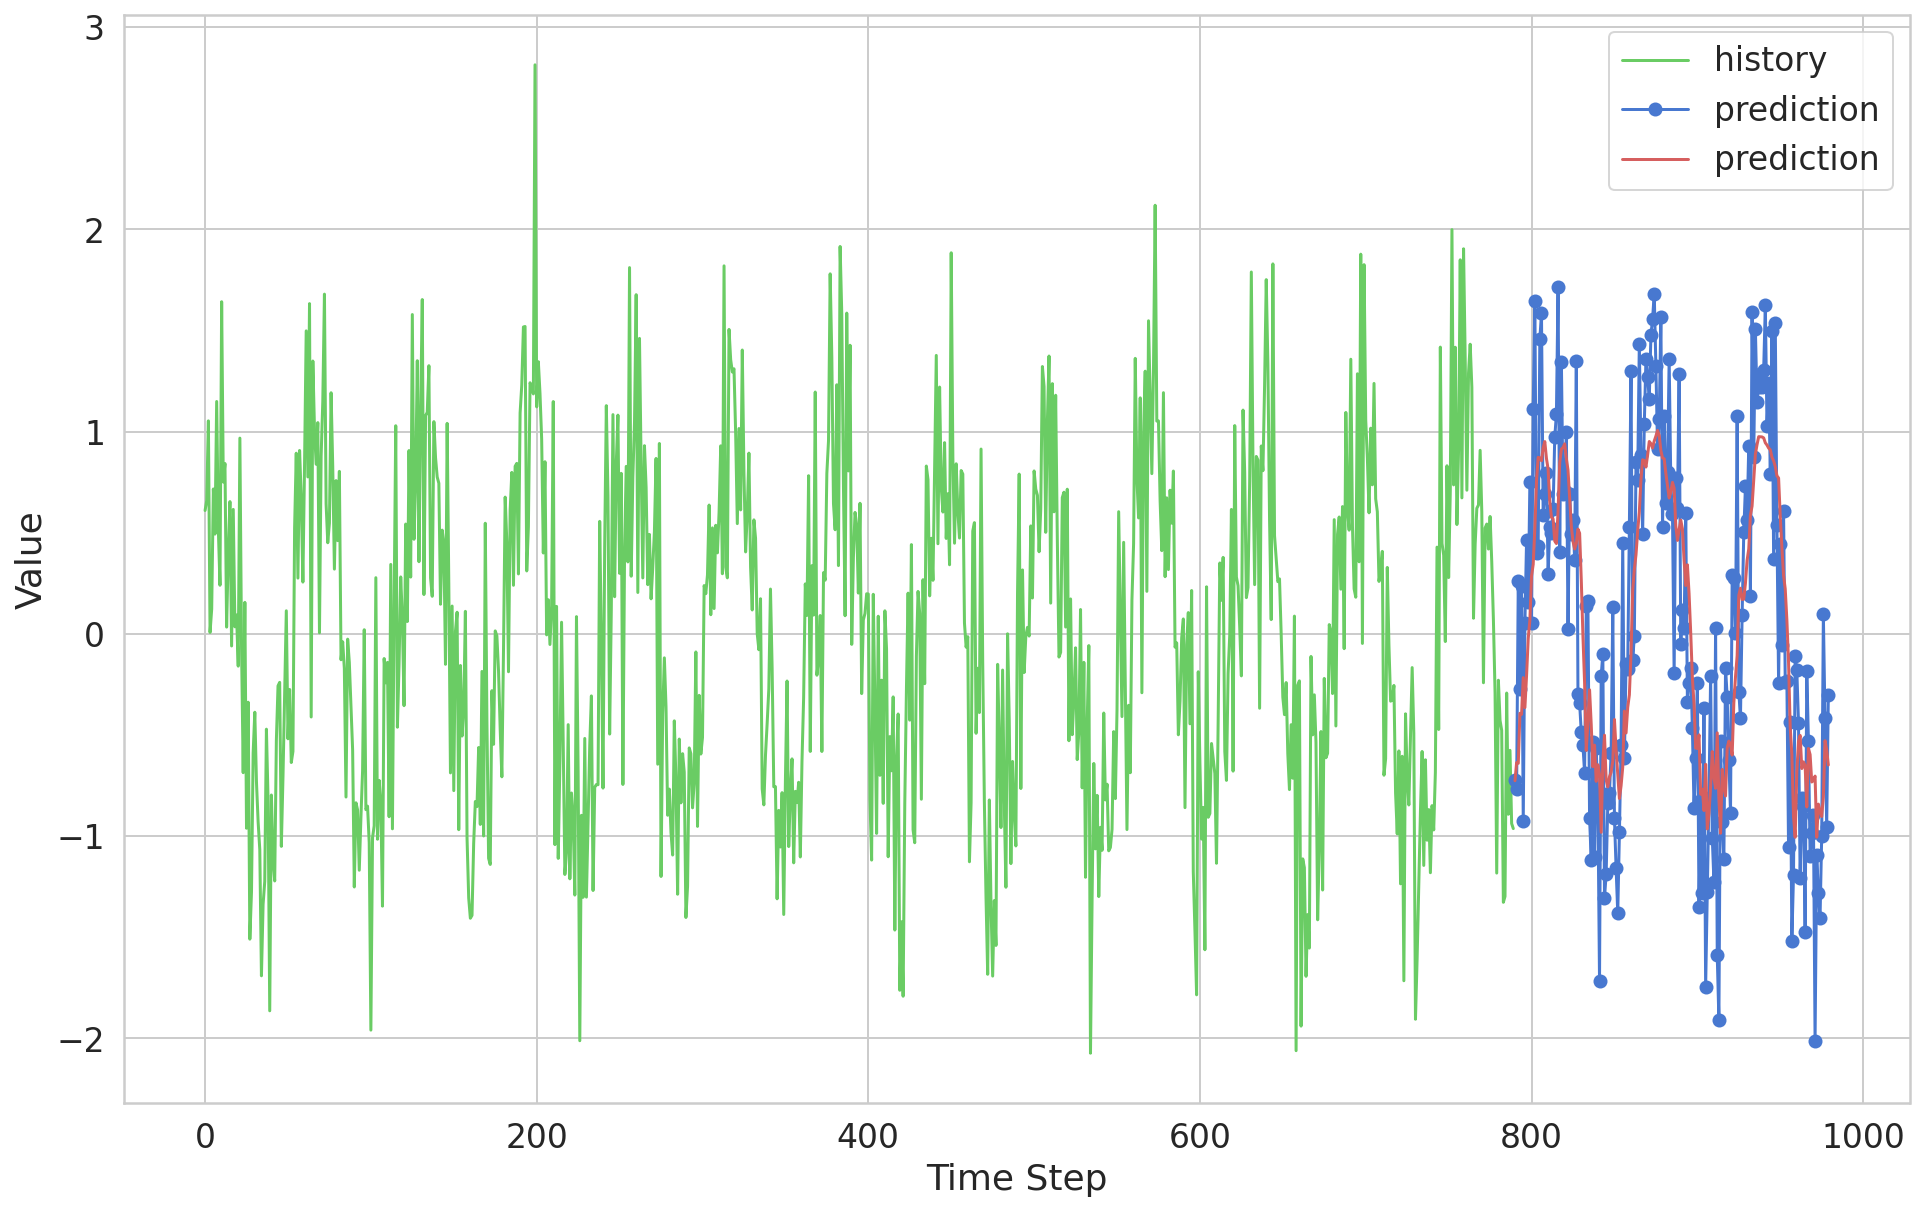

In [19]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='o',label='prediction')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label='prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

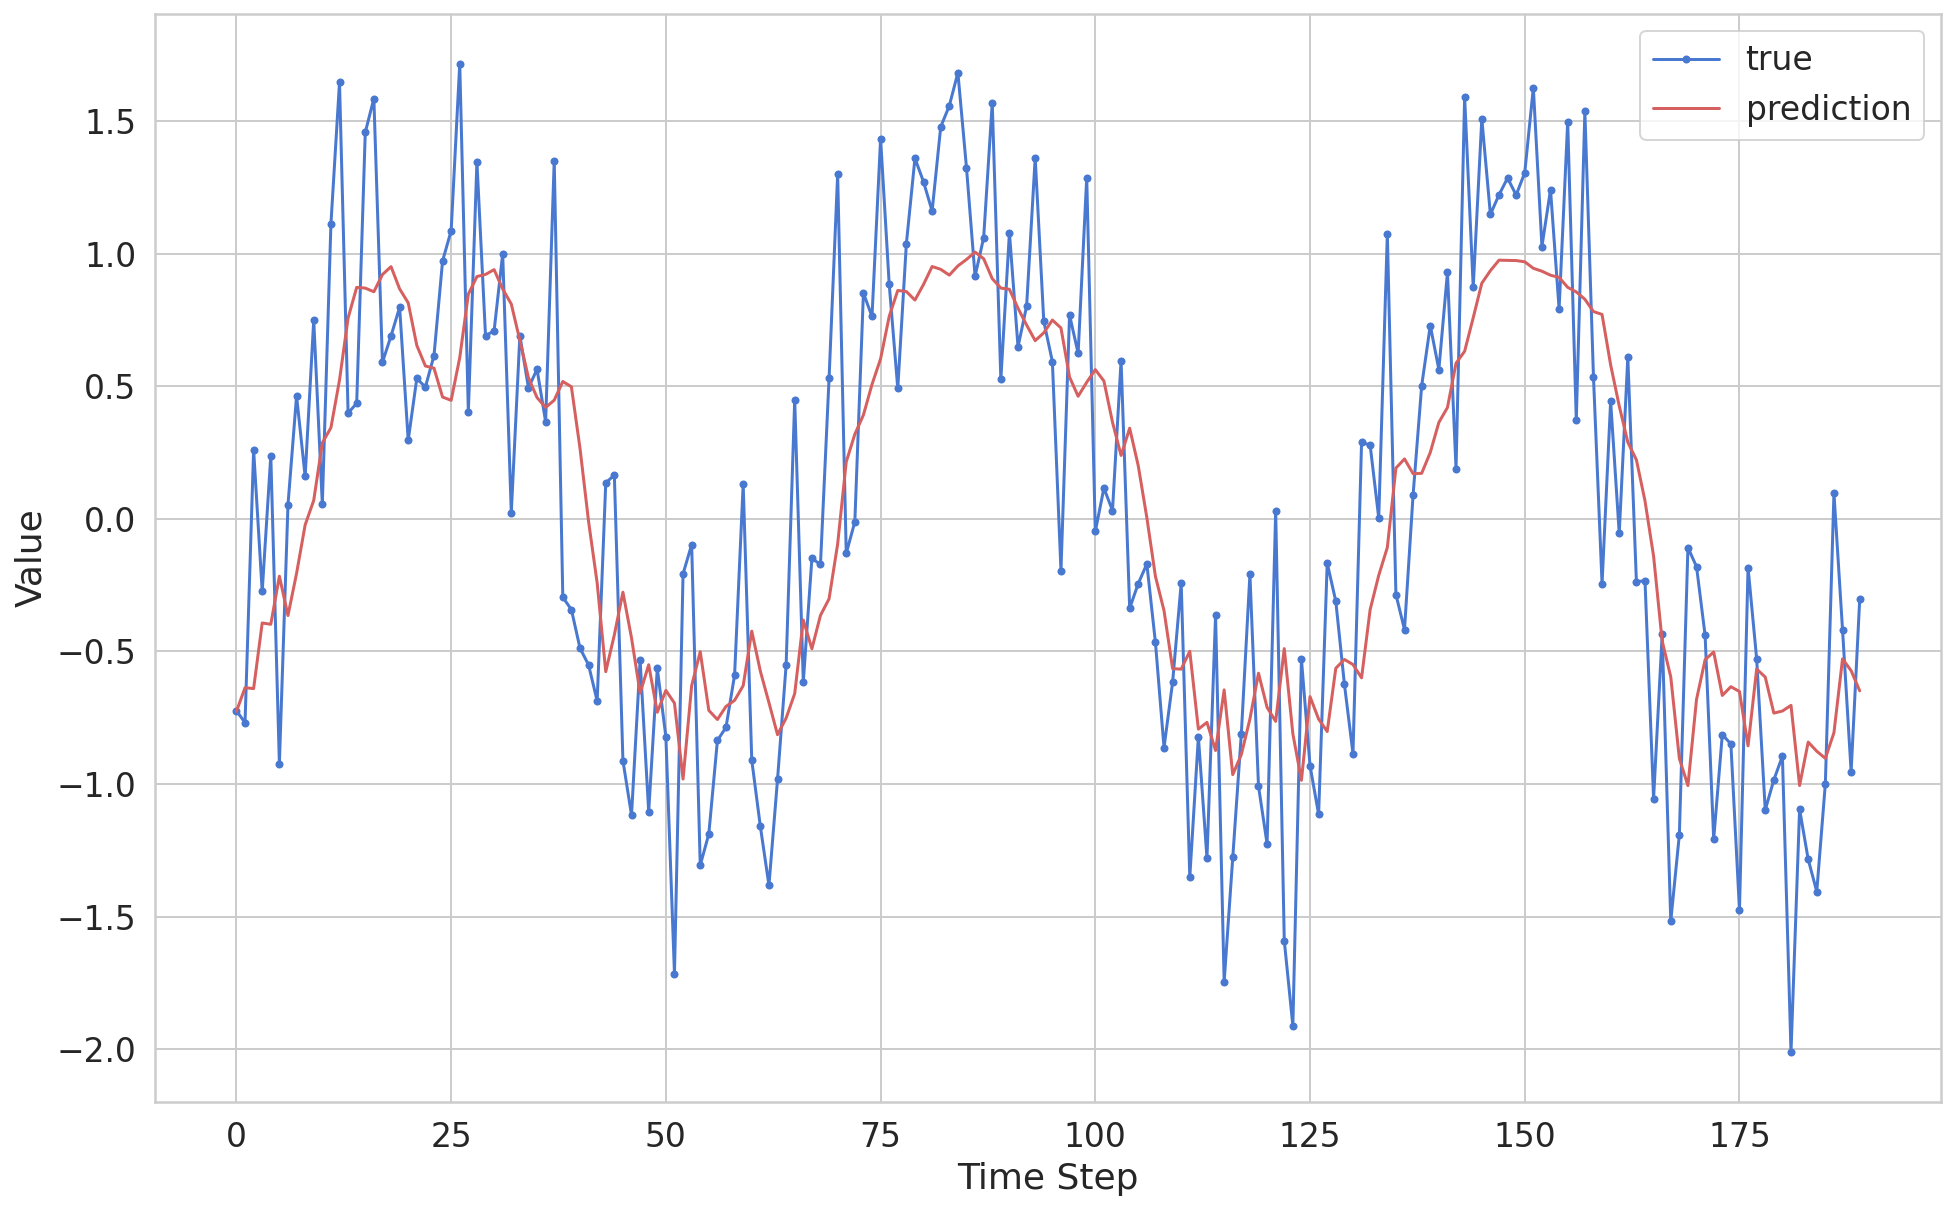

In [20]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();